In [2]:
import pandas as pd
import urllib

url = 'https://bit.ly/wine-date'
urllib.request.urlretrieve(url,'wine.csv')

('wine.csv', <http.client.HTTPMessage at 0x24aff06a3d0>)

In [21]:
wine =pd.read_csv('wine.csv')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [22]:
wine.shape

(6497, 4)

In [23]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [24]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [25]:

data_X = wine[['alcohol', 'sugar', 'pH']].to_numpy()

In [26]:
data_Y = wine['class'].to_numpy()

In [27]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_Y, test_Y = train_test_split(data_X, data_Y,test_size=0.2, random_state=42)



In [28]:
print(train_X.shape, test_X.shape)

(5197, 3) (1300, 3)


In [29]:
from sklearn.preprocessing import StandardScaler
import numpy as np

ss = StandardScaler()
ss.fit(train_X)
train_X_scaled = ss.transform(train_X)
test_X_scaled = ss.transform(test_X)

In [38]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_X_scaled, train_Y)

LogisticRegression()

In [39]:
print(lr.score(train_X_scaled, train_Y))
print(lr.score(test_X_scaled, test_Y))

0.7808350971714451
0.7776923076923077


In [40]:
train_Y

array([1., 0., 0., ..., 1., 1., 0.])

In [42]:
print(lr.coef_, lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


In [45]:
np.sum(train_Y == 1) / train_Y.shape[0]

0.7579372715027901

In [46]:
np.sum(test_Y == 1) / test_Y.shape[0]

0.7376923076923076

In [48]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(train_X_scaled, train_Y)

print(dt.score(train_X_scaled, train_Y))
print(dt.score(test_X_scaled, test_Y))

0.996921300750433
0.86


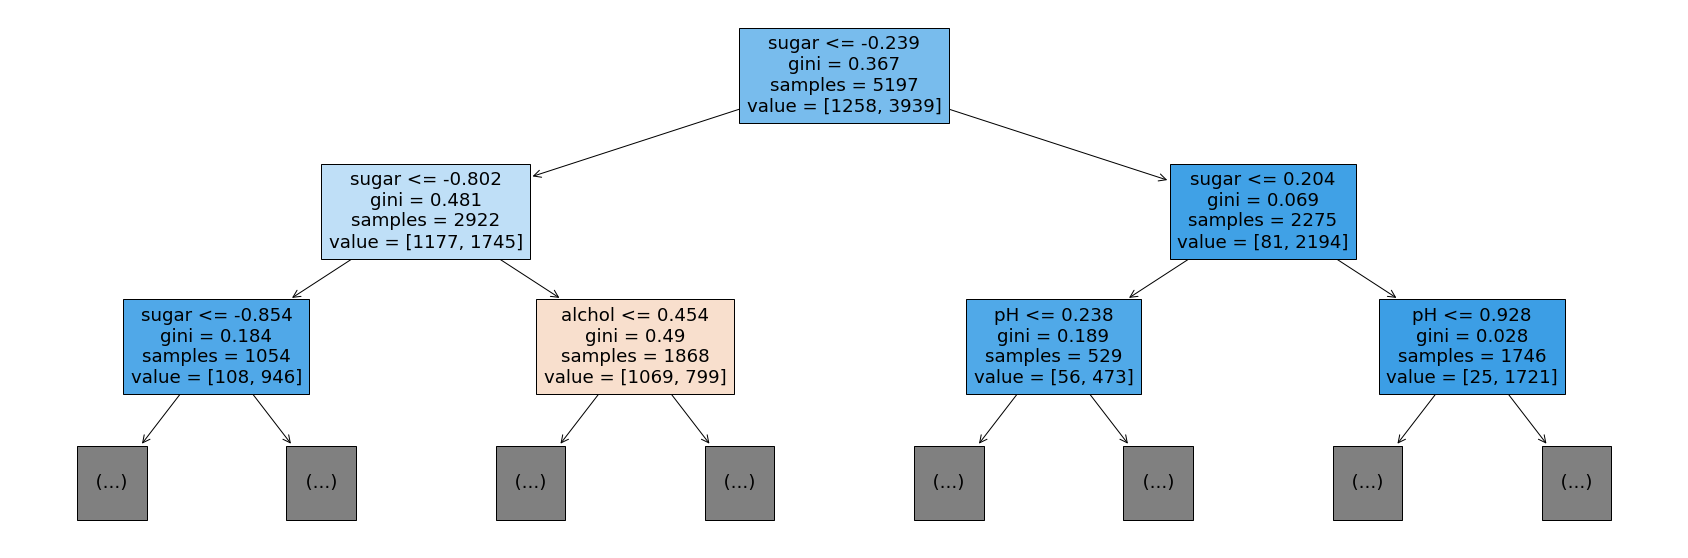

In [60]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize = (30,10))
plot_tree(dt, max_depth=2, filled=True,feature_names=['alchol','sugar','pH'])
plt.show()

In [64]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_X, train_Y)
print(dt.score(train_X,train_Y))
print(dt.score(test_X, test_Y))

0.8454877814123533
0.8415384615384616


In [62]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_X_scaled, train_Y)
print(dt.score(train_X_scaled,train_Y))
print(dt.score(test_X_scaled, test_Y))

0.8454877814123533
0.8415384615384616


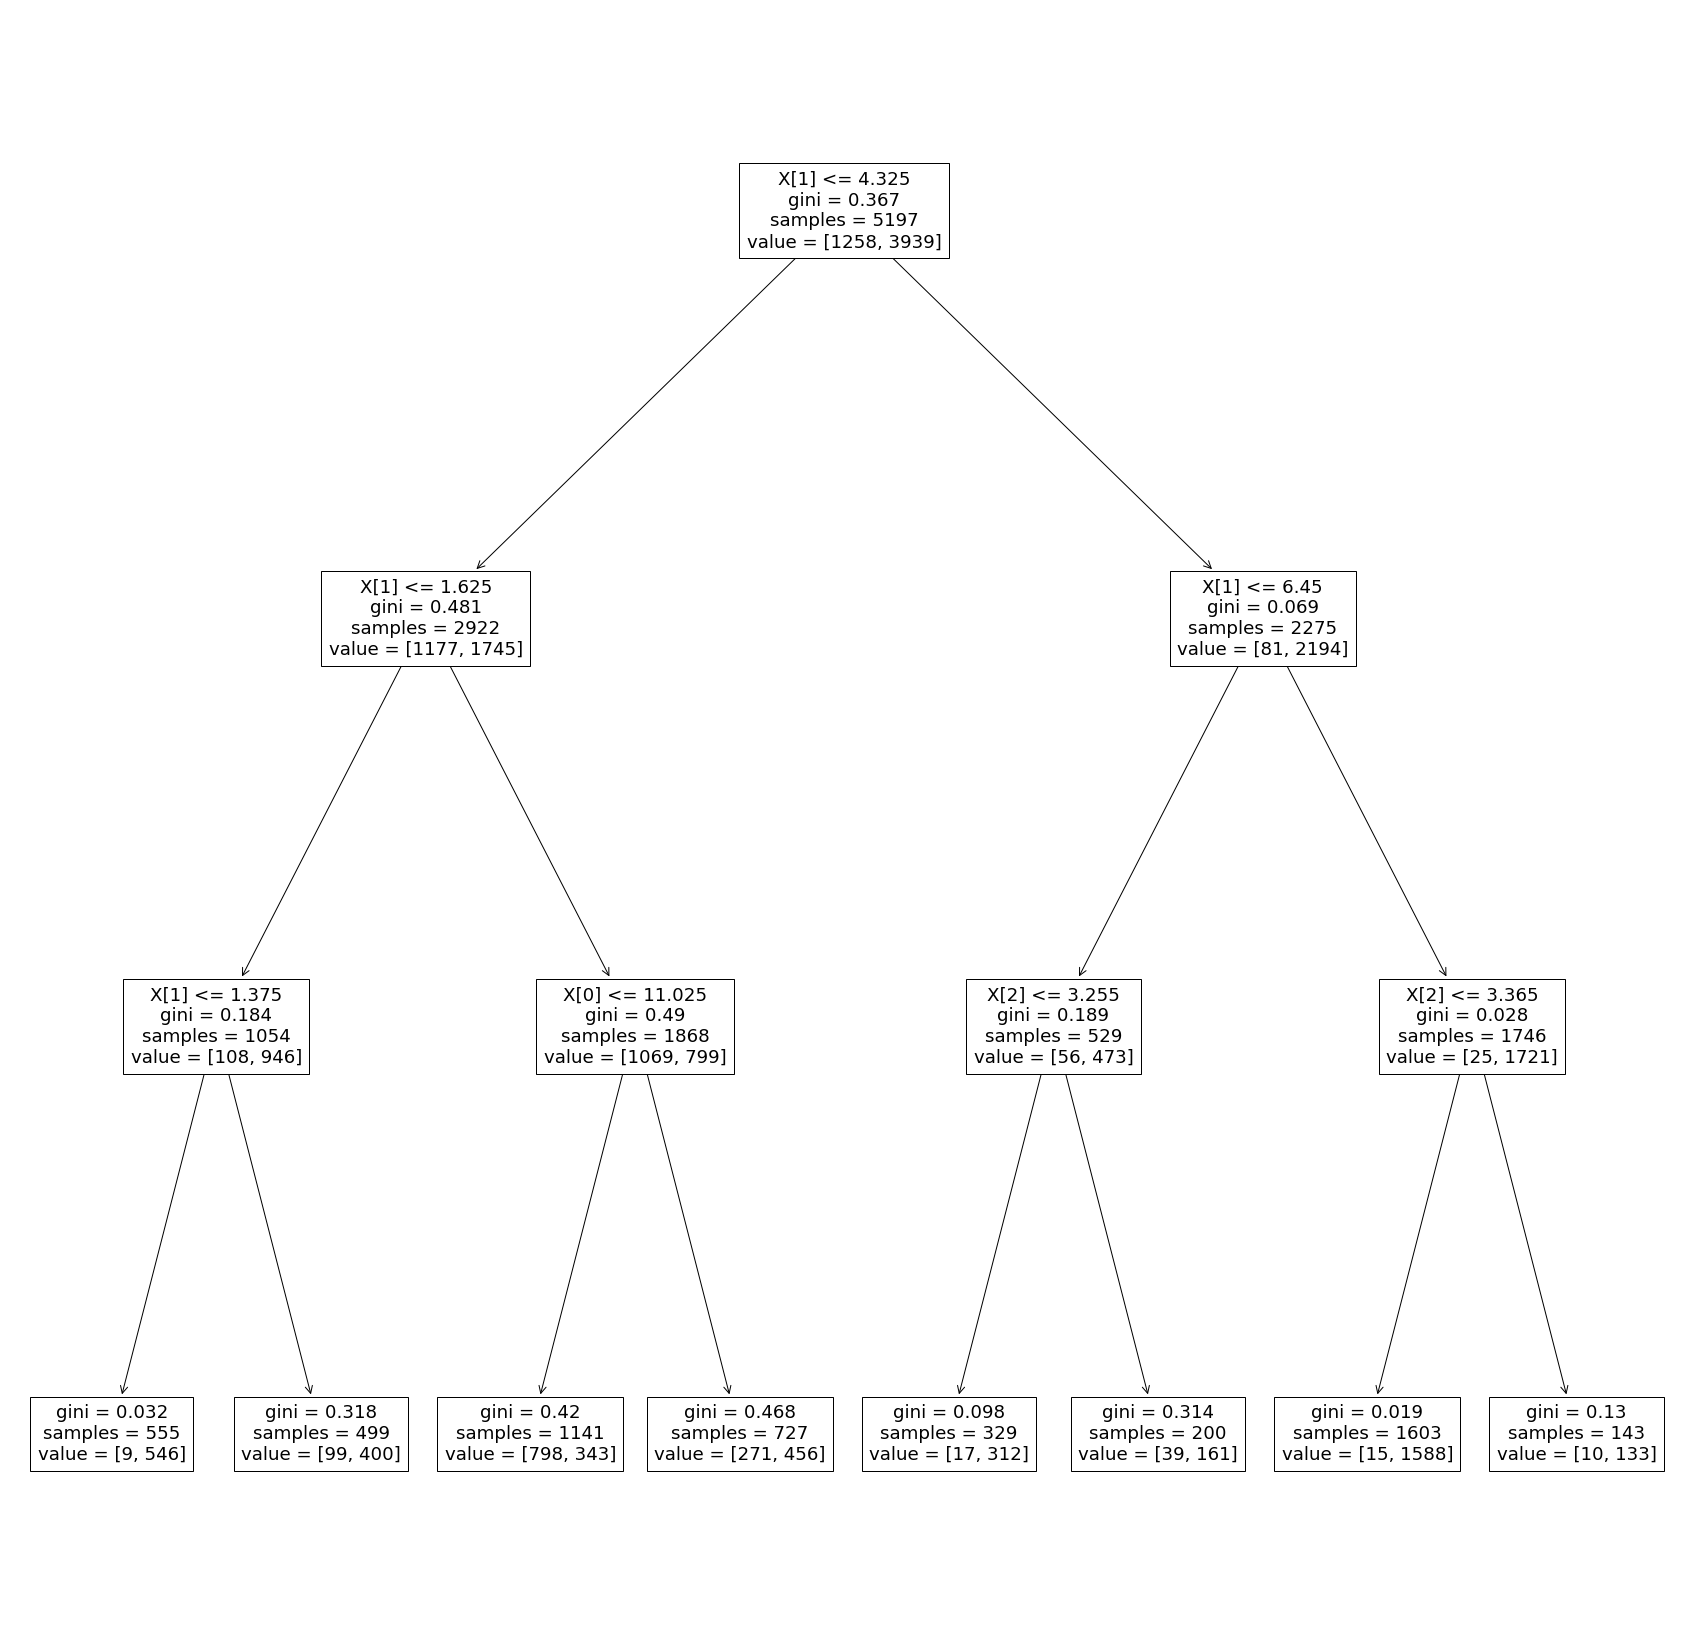

In [66]:
plt.figure(figsize=(30,30))
plot_tree(dt,max_depth=3)
plt.show()

In [68]:
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]
